<a href="https://colab.research.google.com/github/AlexanderAvocone/Project/blob/master/UdH1_LogReg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Unter der Haube 1: Logistische Regression**

##**Testdaten**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


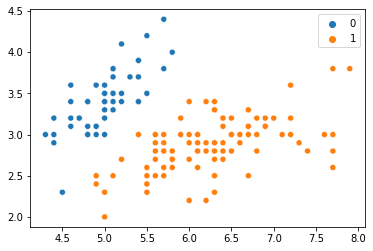

In [354]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.datasets import load_iris
iris = load_iris()

X = iris.data[:, :2]
Y = (iris.target != 0) * 1

sns.scatterplot(X[:,0], X[:,1], hue = Y)


##**Sigmoid Funktion:**
$s(w) = \frac{1}{1+e^{-w}}$ wobei $w = w_1x_{11} + w_2x_{12} + ... w_mx_{nm} = \hat{X}\vec{w}$

In [355]:
def W(X, w):
  #X.shape = (n, dimensions)
  #w.shape = (dimensions , 1)
  #omega.shape = (n, 1) = X * w
  return np.dot(X,w)

def sigmoid(z):
    return 1/(1+np.exp(-z))

#Startvalues for w
w = np.ones(shape= (X.shape[1],1))

#h0 for costfunction
h0 = sigmoid(W(X,w))

# y.shape = (150,) gibt Probleme nachher bei h0-y
Y.shape =(len(Y),1)



##**Cost-Function:**
Für die Cost-Function $J(w)$  wird die Cross-Entropy-/Log-Loss-Function verwendet, da MSE (L2) keine "glatte" Kurve für $J(w)$ liefert.
$\operatorname{Cost}\left(h_{w}(x), y\right)=\left\{\begin{array}{ll}-\log \left(h_{w}(x)\right) & \text { if } \mathbf{y}=1 \\ -\log \left(1-h_{w}(x)\right) & \text { if } \mathbf{y}=0\end{array}\right. \rightarrow \: \: J(w)=-\frac{1}{m} \sum_{i=1}^{m} [y_i \log \left(h_{w}(x_i)\right)+(1-y_i) \log \left(1-h_{w}(x_i)\right)]$

In [356]:
def cost_function(h0,y):
  
  y1 = y*np.log(h0)
  y0 = (1-y)*np.log(1-h0)
  cost = -(y1+y0).mean()
  return cost


##**Gradient descent**
Minimum der Cost-Function zur Bestimmung von $w_{new}$ in jeder Iteration.

$\nabla_{\theta}J(w) = \frac{1}{m} \sum_{i=1}^{m}\left(h_{w}\left(x^{(i)}\right)-y^{(i)}\right) x_{j}^{(i)} \: \rightarrow \: \: w_{new,i} = w_i - \alpha \: \partial_{w_i} J(\theta)$ 

In [357]:
def W_new(X, w, h0, y, alpha):
 
  m = len(y)
  # X-(150,2), h0-(150,1), y-(150,1) w-(2,1) -->   X.T * (h0-y) - (2,1)
  gradient = np.dot(X.T,h0-y)/m
  #w_neu:
  w = w - alpha*gradient
  return w



##**Training**

In [358]:
def train(X, w, y, alpha, iter = 10000):

  cost_all = []
  w0_all = []
  w1_all = []
  for i in range(iter):
    w = W_new(X,w, sigmoid(W(X,w)), Y, alpha)

    #Get all costs to plot later
    cost = cost_function(sigmoid(W(X,w)),Y)
    cost_all.append(cost)
    w0_all.append(w[0])
    w1_all.append(w[1])

  return w, cost_all, w0_all, w1_all


def predict(X, w, treshold = 0.5):
  return sigmoid(np.dot(X,w)) >= treshold

W,cost,w1,w2 = train(X,w,y,.01)


##**Visualsierung von cost und $w$**

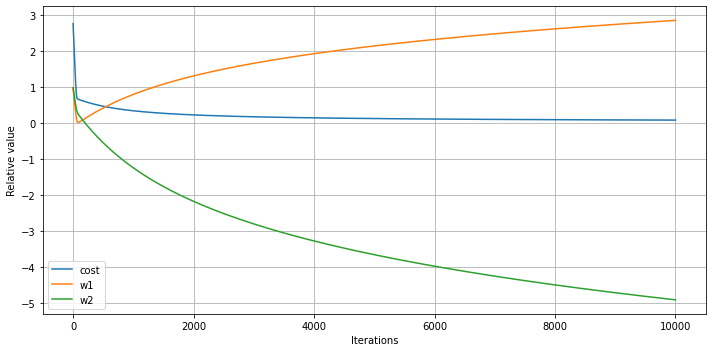

In [359]:
iterations = np.linspace(0,10000,10000)


plt.figure(figsize=(10,5), tight_layout = True)
plt.plot(iterations, cost, label = "cost")
plt.plot(iterations, w1, label = "w1")
plt.plot(iterations, w2, label = "w2")
plt.xlabel("Iterations")
plt.ylabel("Relative value")
plt.legend()
plt.grid()


##**Vergleich mit Sklearn**

In [366]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

logreg = LogisticRegression()
Y.shape = (150,)
X_train, x_test, Y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=101, stratify = Y)
logreg.fit(X_train, Y_train)

#Vergleich
print("DIY-logistic regression:")
print(W.shape)
print("Final w1:",W[0,0], "   Final w2:",W[1,0])

coeff = logreg.coef_
print("\nSklearn:")
print(coeff.shape)
print(print("Final w1:",coeff[0,0], "   Final w2:",coeff[0,1]))


DIY-logistic regression:
(2, 1)
Final w1: 2.8599988111734396    Final w2: -4.906903072966444

Sklearn:
(1, 2)
Final w1: 2.937708819892263    Final w2: -2.749779540643096
None
